# Lecture 5: Numerical and graphical techniques I (univariate)

## Lecture overview

1. [Numerical and graphical techniques](#section1)
2. [Plots of variables over time](#section2)
3. [Plots of variables as a function of the variables themselves](#section3)
4. [Summary](#section4)

<span id='section1'></span>
## 1. Numerical and graphical techniques
<hr>

Before we jump into more rigorous mathematical analyses, we’re first going to learn how to get a feel for the dynamics of our models.

To do so we’re going to choose some particular numerical values for our parameters and then use our models to predict what happens over time.

The downside of this approach is that we often won’t know the parameter values to choose and, regardless, choosing particular values doesn’t tell us about the dynamics of our model more generally.

The upside is that this approach can highlight errors or reveal unexpected patterns that guide future mathematical analyses.

<span id='section2'></span>
## 2. Plots of variables over time
<hr>

### Exponential growth model

In the discrete exponential growth model, there is one parameter, $R$, the number of offspring per parent ("reproductive factor").

In last week’s lab we wrote a recursive function (actually, a generator) to generate values of $n(t)$, the population size, at sequential time points.

In [1]:
import numpy as np

def n(t0, n0, R, max=np.inf):
    # Set the initial value of t and n(t)
    t, nt = t0, n0
    
    # Yield new values of n(t) if t hasn't gone past the max value
    while t < max: 
        yield nt 
        
        # Then update t and n(t)
        t, nt = t + 1, nt * R

We then chose some **parameter values** (reproductive factor, $R = 2$) and **initial conditions** (initial population size, $n(0) = 1$) to get the values of $n(t)$ from the initial ($t = 0$) to final ($t = 10$) time.

In [2]:
nt = n(t0=0, n0=1, R=2, max=10) #choose some parameter values
nts = [n for n in nt] #get all the t, n(t) values
nts

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512]

And we then plotted $n(t)$ as a function of $t$

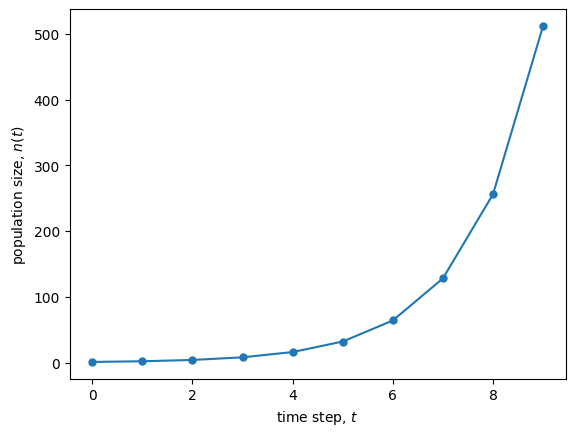

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(range(10), nts, marker = '.', markersize = 10)
ax.set_xlabel('time step, $t$')
ax.set_ylabel('population size, $n(t)$')
plt.show()

This allowed us to compare what happens for different values of the reproductive factor, $R$.

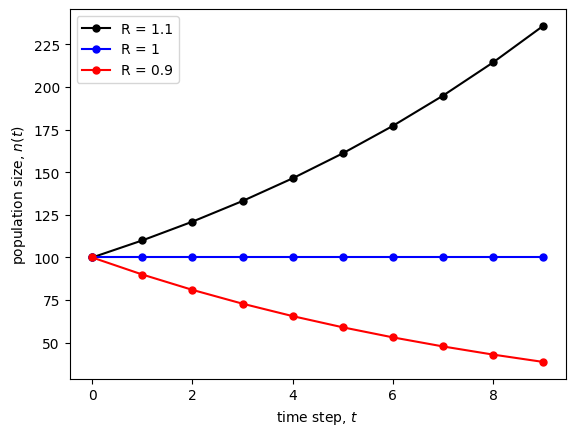

In [5]:
colors = ['black','blue','red']
fig, ax = plt.subplots()
for i, R in enumerate([1.1,1,0.9]):
    nt = n(t0=0, n0=100, R=R, max=10)
    nts = [n for n in nt]
    ax.plot(range(10), nts, color=colors[i], label=f"R = {R}", marker = '.', markersize = 10)

ax.set_xlabel('time step, $t$')
ax.set_ylabel('population size, $n(t)$')
ax.legend()
plt.show()

From this we can deduce that when $R>1$ the population grows, when $R<1$ the population declines, and when $R=1$ the population size remains constant.

### Logistic growth model

In the discrete logistic growth model there are two parameters, the intrinsic growth rate, $r$, and the carrying capacity, $K$. The behaviour doesn’t change much with different values of $K$ but it is *extremely* sensitive to the value of $r$, as you may remember from Lab 2.

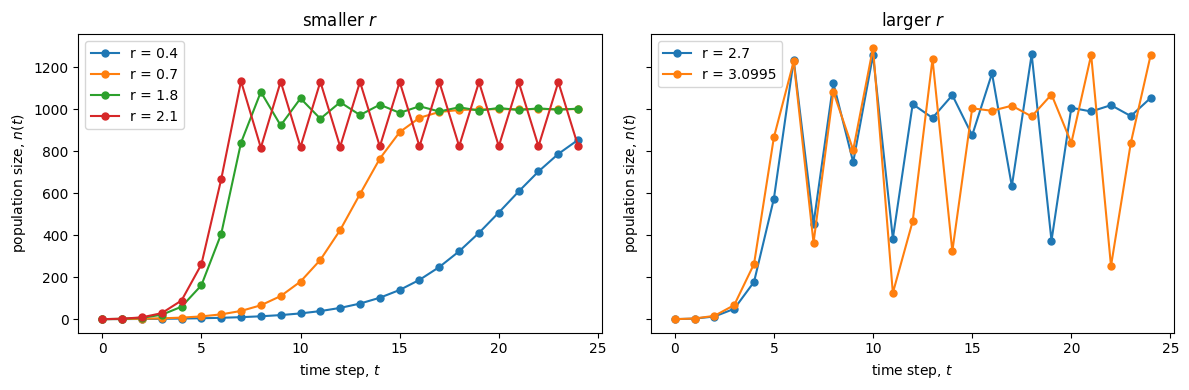

In [7]:
def n(n0, r, k, max=np.inf):
    t, nt = 0, n0
    while t < max:
        yield nt
        t, nt = t + 1, nt + r * nt * (1 - nt / k)
        
# Initialize plots        
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)
fig.set_size_inches(12,4)

# Logistic growth with smaller r values
for r in [0.40, 0.70, 1.80, 2.10]:
    ax[0].plot( #plot lines connecting values for visual clarity
        range(25),
        [nt for nt in n(1, r, 1000, max=25)],
        label = f"r = {r}",
        marker = '.', markersize = 10 
    )

# Logistic growth with larger r values
for r in [2.70, 3.0995]:
    ax[1].plot(
        range(25),
        [nt for nt in n(1, r, 1000, max=25)],
        label = f"r = {r}",
        marker = '.', markersize = 10         
    )

# Add titles and annotations
ax[0].set_title('smaller $r$')
ax[1].set_title('larger $r$')
for i in range(2):
    ax[i].set_xlabel('time step, $t$')
    ax[i].set_ylabel('population size, $n(t)$')
    ax[i].legend()

fig.tight_layout()
plt.show()

!!! note "Bifurcation diagrams and chaos"

    We can examine how this model behaves as we change $r$ by making a **bifurcation diagram**, which plots the values the system takes on after a long time for a given parameter value. Check out the very complex and potentially strange dynamics in the plot below. What does it mean?

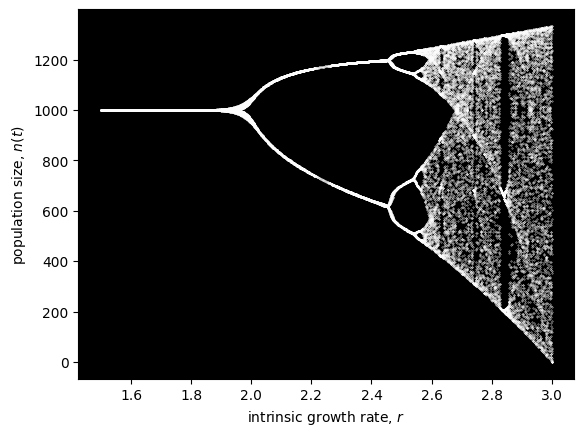

In [8]:
# Sample the periodicity of the oscillations 
# by taking unique values after reaching carrying capacity (here we use t between 30 and 75)
def log_map(r, n0=900, k=1000):    
    return np.unique([nt for t, nt in enumerate(n(n0, r, k, max=75)) if t > 30])

# Compute the logistic map for different growth rates in discrete time
r, Nr = np.array([]), np.array([]) #list of r and n(t) values we will plot
for i in np.linspace(1.5, 3, 1000): #these are the r values we will simulate
    nl = log_map(i) #get the unique values after carrying capacity
    r = np.hstack((r, [i for _ in range(len(nl))])) #add the r value to plotting list (repeat the value of r for each unique n(t) value (for plotting))
    Nr = np.hstack((Nr, nl)) #add the n(t) values to plotting list
    
# Plot the logistic map on a black background (why not?)
fig, ax = plt.subplots()
ax.patch.set_facecolor('black')
ax.scatter(r, Nr, s=0.075, color='white')
plt.xlabel('intrinsic growth rate, $r$')
plt.ylabel('population size, $n(t)$')
plt.show()

<span id='section3'></span>
## 3. Plots of variables as a function of the variables themselves
<hr>

OK, so now we’ll move on to a plot that is easier to generate and is very useful for models with just one variable (which is what we’ve been working with so far).

Instead of plotting the variable as a function of time, we’ll plot the variable as a function of the variable in the previous time, e.g., plotting $n(t+1)$ as a function of $n(t)$.

### Haploid selection

Let's start with our model of haploid selection

$$
p(t+1) = \frac{W_A p(t)}{W_A p(t) + W_a (1-p(t))}
$$

and plot for two different sets of parameter values, where $A$ has a higher or lower fitness than $a$. 

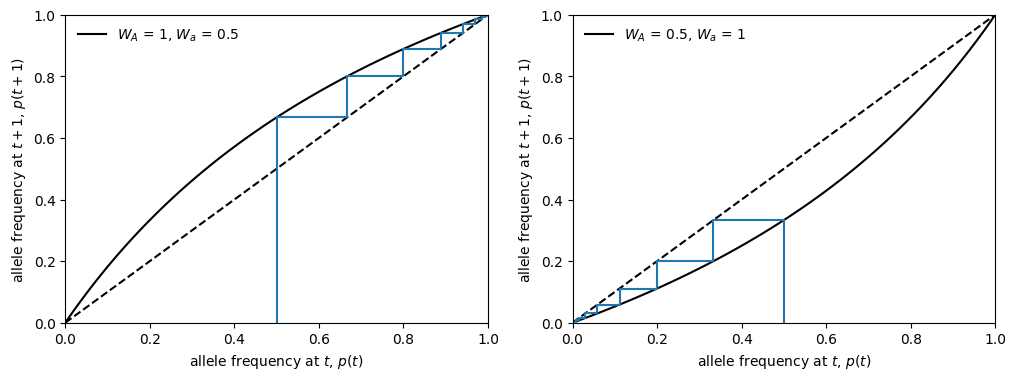

In [9]:
import sympy

# Build cobweb plotting function
def cobweb_haploid(p0, WA, Wa, max=np.inf):
    t, pnow, pnext = 0, p0, 0 #initial conditions
    while t <= max:
        yield pnow, pnext #current value of p(t) and p_(t+1)
        pnext = (WA * pnow) / (WA * pnow + Wa * (1 - pnow)) #update p_(t+1)
        yield pnow, pnext #current value of p(t) and p_(t+1)
        pnow = pnext #update p(t)
        t += 1 #update t
        
# Build function for generating figure
def plot_haploid_selection(WA, Wa, p0=0.5, ax=None):
    pt = sympy.symbols('pt') #define our variable p(t)

    # Write out sympy equation
    f = (WA * pt) / (WA * pt + Wa * (1 - pt)) #the recursion equation

    # Compute function over a set of points in [0,1] by 'lambdifying' sympy equation (turn it into a function)
    t = np.linspace(0,1,100)
    fy = sympy.lambdify(pt, f)(t)

    # Build plot
    if ax == None:
        fig, ax = plt.subplots()
    ax.plot(t, fy, color='black', label=f"$W_A$ = {WA}, $W_a$ = {Wa}") #plot p_(t+1) as function of p(t)
    ax.plot(t, t, color='black', linestyle='--') #draw 1:1 line for reference
    
    # Add cobweb
    cobweb = np.array([p for p in cobweb_haploid(p0, WA, Wa, max=100)])
    ax.plot(cobweb[:,0], cobweb[:,1])
    
    # Annotate and label plot
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.set_xlabel("allele frequency at $t$, $p(t)$")
    ax.set_ylabel("allele frequency at $t+1$, $p(t+1)$")
    ax.legend(frameon=False)
    return ax
        
# Plot figure
fig, ax = plt.subplots(1,2)
fig.set_size_inches(12,4)

# First cobweb with WA > Wa
plot_haploid_selection(WA = 1, Wa = 0.5, ax=ax[0])

# Second cobweb with WA < Wa
plot_haploid_selection(WA = 0.5, Wa = 1, ax=ax[1])

plt.show()

There are three components to this plot. First, the solid curve gives the recursion itself ($p(t+1)$ as a function of $p(t)$). Second, the dashed line shows where $p(t+1)=p(t)$. And third, the blue lines show how the variable changes over multiple time steps. 

Foreshadowing what is to come (Lecture 7), the dashed line is helpful for two reasons. First, it indicates where the variable does not change over time. So wherever the recursion (solid line) intersects with the dashed line is an **equilibrium**. Second, it reflects $p(t+1)$ back onto $p(t)$, updating the variable. For example, in the left panel above we start with an allele frequency of $p(t)=0.5$, draw a blue vertical line to the recursion to find $p(t+1)$, and then update $p(t)$ to $p(t+1)$ by drawing the horizontal blue line to the dashed line. Now we can ask what $p(t+1)$ is given this updated value of $p(t)$ by drawing another vertical blue line, and so on. Following the blue line we can therefore see where the system is heading, which tells us about the **stability** of the equilibria. What are the stable equilibria in the two panels above?

### Diploid selection

To demonstrate the utility of this method, let’s move on to the slightly more complex model of diploid selection

$$
p(t+1) = \frac{W_{AA} p(t)^2 + W_{Aa}p(t) q_t}{W_{AA}p(t)^2 + W_{Aa}2p(t)q_t + W_{aa}q_t^2}
$$

To show some different behaviour than above, this time let's set $W_{AA} < W_{Aa} > W_{aa}$ and plot for two different starting frequencies, $p_0$.

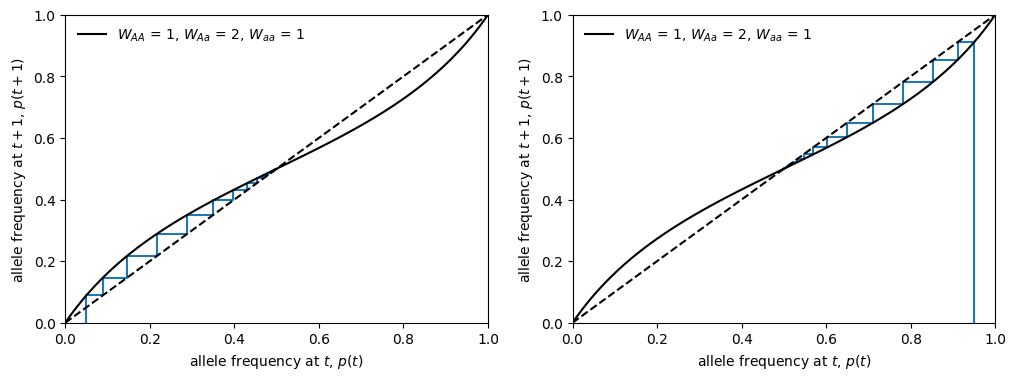

In [10]:
def cobweb_diploid(p0, WAA, WAa, Waa, max=np.inf):
    t, pnow, pnext = 0, p0, 0 #initial conditions
    while t <= max:
        yield pnow, pnext #current value of p(t) and p(t+1)
        pnext = (WAA * pnow**2 + WAa * pnow * (1 - pnow)) / (WAA * pnow**2 + WAa * 2 * pnow * (1 - pnow) + Waa * (1 - pnow)**2) #update p(t+1)
        yield pnow, pnext #current value of p(t) and p(t+1)
        pnow = pnext #update p(t)
        t += 1 #update t
        
# Build function for generating figure
def plot_diploid_selection(WAA, WAa, Waa, ax=None, p0=0.5):
    pt = sympy.symbols('pt') #define our variable p(t)

    # Write out sympy equation
    f = (WAA * pt**2 + WAa * pt * (1- pt) ) / (WAA * pt**2 + WAa * 2 * pt * (1 - pt) + Waa * (1 - pt)**2) #the recursion equation

    # Compute function over a set of points in [0,1] by 'lambdifying' sympy equation
    x = np.linspace(0,1,100)
    fy = sympy.lambdify(pt, f)(x)
    
    # Build plot
    if ax == None:
        fig, ax = plt.subplots()
    
    # Add cobweb
    cobweb = np.array([p for p in cobweb_diploid(p0, WAA, WAa, Waa, max=100)])
    ax.plot(cobweb[:,0], cobweb[:,1])
    
    # Annotate and label plot
    ax.plot(x, fy, color='black', label=f"$W_A$$_A$ = {WAA}, $W_A$$_a$ = {WAa}, $W_a$$_a$ = {Waa}")
    ax.plot(x, x, color='black', linestyle='--')
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.set_xlabel("allele frequency at $t$, $p(t)$")
    ax.set_ylabel("allele frequency at $t+1$, $p(t+1)$")
    ax.legend(frameon=False)
    return ax

# Plot figure
fig, ax = plt.subplots(1,2)
fig.set_size_inches(12,4)

# First cobweb from low starting condition
plot_diploid_selection(WAA=1, WAa=2, Waa=1, p0=0.05, ax=ax[0])

# Second cobweb from high starting condition
plot_diploid_selection(WAA=1, WAa=2, Waa=1, p0=0.95, ax=ax[1])

plt.show()

How many equilibria are there? Which appear to be stable?

### Difference/differential equations

We can do something very similar for difference and differential equations.

Now we plot the **change** in the variable as a function of the current value of the variable, e.g., plot $\Delta n$ or $dn/dt$ as a function of $n(t)$.

For example, in our model of haploid selection we have

$$
\frac{\mathrm{d}p}{\mathrm{d}t} = sp(1-p)
$$

and our plot looks like:

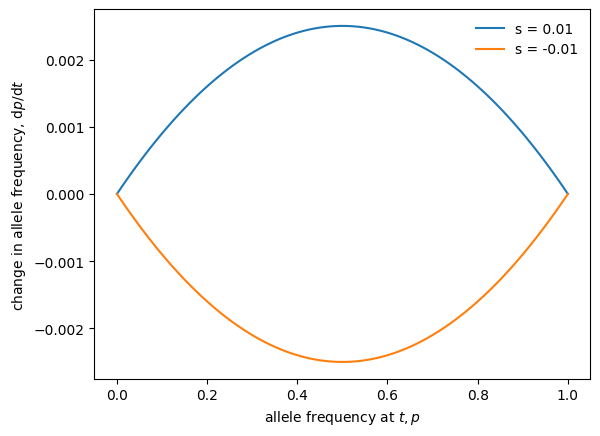

In [11]:
# Initialize sympy symbols
p0, s, t = sympy.symbols('p0, s, t')
p = sympy.Function('t')

# Specify differential equation
diffeq = sympy.Eq(p(t).diff(t), s * p(t) * (1 - p(t)))

# Convert differential equation RHS to pythonic function
dp = sympy.lambdify((s, p(t)), diffeq.rhs)

# Plot the curve
fig, ax = plt.subplots()

for s_coeff in [0.01, -0.01]:
    ax.plot(
        np.linspace(0, 1, 100),
        dp(s_coeff, np.linspace(0,1, 100)),
        label=f"s = {s_coeff}"
    )

ax.set_xlabel('allele frequency at $t, p$')
ax.set_ylabel('change in allele frequency, $\mathrm{d}p/\mathrm{d}t$')
ax.legend(frameon=False)
plt.show()

What does this tell us about how allele frequency will change when $s>0$ vs. $s<0$? And what allele frequencies, $p$, cause more rapid evolution?

<span id='section4'></span>
## 4. Summary
<hr>

To get a feel for our model it is helpful to graph some numerical examples:

- Plot the variable as a function of time ("simulate")
- Plot the variable (or change in variable) as a function of itself (only works for models with one variable)

Next lecture we’ll look at a graphical technique for models with multiple variables...